**Box Cox Transformation Time Series**

By utilizing a Box-Cox transformation on your time series data, you can help stabilize the variance, which is an important step in making data stationary. Once you apply the transformation you should also consider differencing which will be covered in this lesson

In [1]:
# Import the required libraries
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv('/content/sample_data/all_stocks_5yr.csv')

In [4]:
# Check the dataset
apple_df = df[df["Name"] == "AAPL"].copy()
apple_df.head()

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


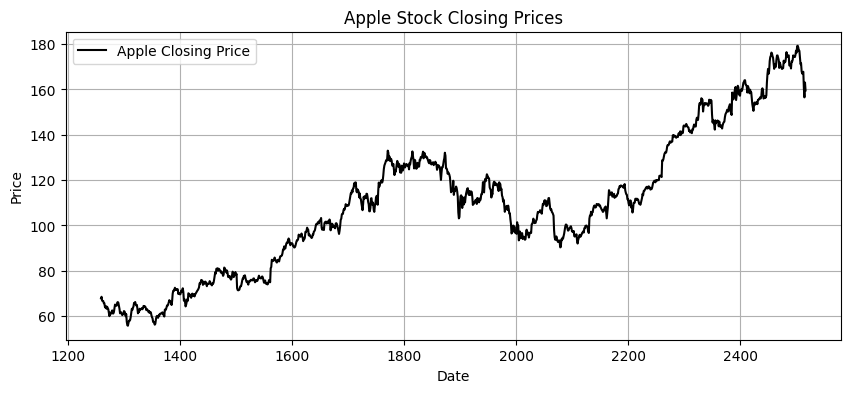

In [5]:
plt.figure(figsize=(10, 4))
plt.plot(apple_df["close"], label="Apple Closing Price", color="black")
plt.title("Apple Stock Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
print((apple_df["close"] <= 0).any()) # Should be False for Box-Cox to work

False


In [7]:
apple_df["close_box_cox"], lam = boxcox(apple_df["close"])

In [8]:
print(lam)

0.40882152476226474


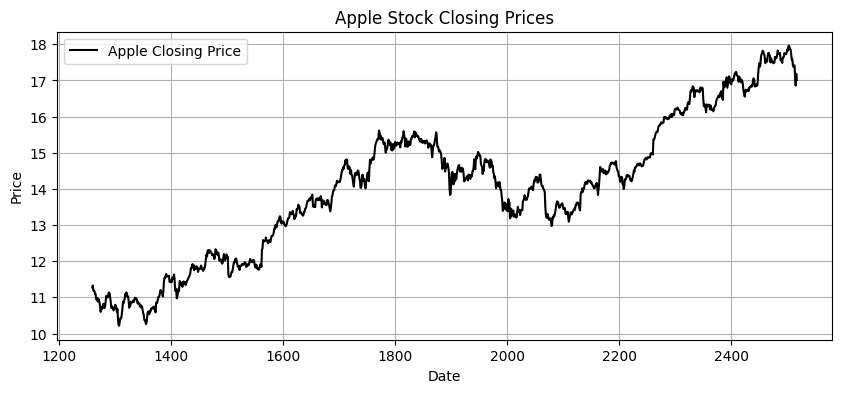

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(apple_df["close_box_cox"], label="Apple Closing Price", color="black")
plt.title("Apple Stock Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
apple_df["close_box_cox_diff"] = pd.Series(apple_df["close_box_cox"]).diff()

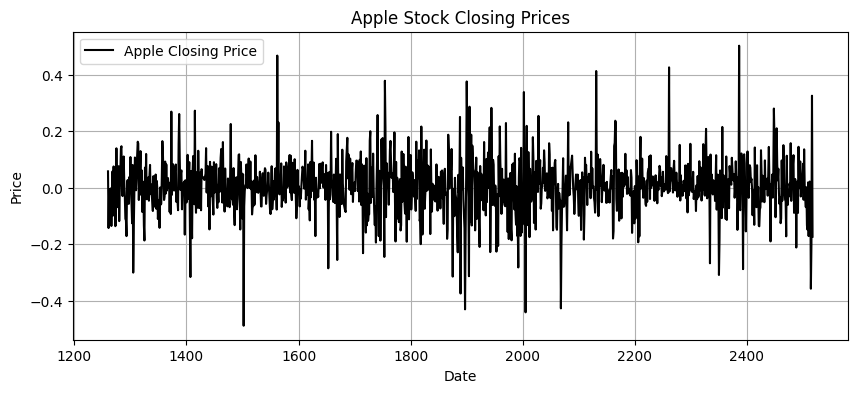

In [12]:
plt.figure(figsize=(10, 4))
plt.plot(apple_df["close_box_cox_diff"], label="Apple Closing Price", color="black")
plt.title("Apple Stock Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
adf_test = adfuller(apple_df["close_box_cox_diff"].dropna()) # Drop NaNs if necessary

In [14]:
print("p-value:", adf_test[1])

p-value: 0.0


In [16]:
if adf_test[1] < 0.05:
  print("The time series is stationary (reject H0).")
else: print("The time series is not stationary (fail to reject H0).")

The time series is stationary (reject H0).
